# Demo for `OSGenerator.py`
## Import

In [1]:
from osgenerator import OSGenerator
import numpy as np
import folium
import matplotlib.pyplot as plt

## Reading data

In [2]:
osg = OSGenerator()
osg.read_from_file("data/friends.csv",
                  "data/checkins.csv",
                  "data/places.csv",
                  "data/countries.csv")

# osg.df_places.sample(10)
# osg.df_friends.sample(10)
# osg.df_checkins.sample(10)
# osg.df_countries.sample(10)

## Show information about POI `46092`
This gives information about latitude, longitude, as well as users checked in at this place

In [3]:
osg.get_place_info(46092)

,place_id,lat,lon,country_id
126596,46092,51.459313,5.39153,83


## Show users who visited POI `46092`

In [4]:
osg.get_visitor(46092)

46092    [27396, 152586, 139658, 37388, 132368, 104088,...
dtype: object

## Find all checkins made by user `1000`

In [5]:
osg.get_user_checkin(1000)

,user_id,time,place_id
309925,1000,2010-07-16T14:47:53Z,170409
309926,1000,2010-07-14T20:18:32Z,1440303
309927,1000,2010-07-14T15:22:05Z,46092
309928,1000,2010-07-13T16:50:59Z,1434368
309929,1000,2010-07-13T09:46:22Z,46092
309930,1000,2010-07-13T09:35:48Z,1432559


## Find all checkins made by user `1000` and `97703`

In [6]:
osg.get_user_checkin([1000, 97703])

,user_id,time,place_id
309925,1000,2010-07-16T14:47:53Z,170409
309926,1000,2010-07-14T20:18:32Z,1440303
309927,1000,2010-07-14T15:22:05Z,46092
309928,1000,2010-07-13T16:50:59Z,1434368
309929,1000,2010-07-13T09:46:22Z,46092
309930,1000,2010-07-13T09:35:48Z,1432559
4434457,97703,2010-10-10T11:17:23Z,79535
4434458,97703,2010-10-07T14:30:00Z,748283
4434459,97703,2010-09-29T08:52:22Z,46092
4434460,97703,2010-09-22T18:11:23Z,3915494


## Find all places visited by user `1000` and `97703`

In [7]:
osg.get_user_place([1000, 97703])

,place_id,lat,lon,country_id
100632,558485,41.147428,-8.626177,100
126594,170409,52.365189,4.936566,83
126595,1440303,51.431036,5.463815,83
126596,46092,51.459313,5.391530,83
126597,1434368,51.557459,5.090109,83
126598,1432559,51.456549,5.395113,83
290533,79535,52.387904,4.638623,83
525970,723800,41.147313,-8.610873,100
525976,320602,41.148744,-8.612944,100
526021,711145,41.149205,-8.605986,100


## When did `1000` visit `46092`?

In [8]:
osg.get_checkin_time(1000, 46092)

,user_id,time,place_id
309927,1000,2010-07-14T15:22:05Z,46092
309929,1000,2010-07-13T09:46:22Z,46092


## Find user `1000`'s friends

In [9]:
osg.get_user_friend(1000)

1000    [1, 43588, 615, 207, 1395, 4979]
dtype: object

## Find friends of multiple users

In [10]:
osg.get_user_friend([100, 1, 3])

1      [0, 2, 9, 52, 53, 55, 68, 88, 97, 111, 116, 15...
3      [0, 2, 22, 41, 88, 97, 111, 145, 154, 162, 178...
100    [8448, 8449, 8450, 8451, 8452, 8453, 8454, 845...
dtype: object

## Show OS for user `2`

In [11]:
os1 = osg.get_object_summary(2)
print(os1)

[USER]
| user_id
|       2
|
|---[FRIEND]
|     user_id  friend_id  similarity
|           2       1201    0.169558
|           2       1220    0.135216
|           2          1    0.135135
|           2        207    0.125554
|           2        615    0.122549
|    There are 6 row(s) omitted
|
|---[CHECKIN]
    | user_id                 time  place_id
    |       2 2010-10-21T00:03:50Z     14637
    |       2 2010-10-20T17:18:59Z     59838
    |       2 2010-10-15T16:00:09Z     59838
    |       2 2010-10-12T01:35:37Z     59838
    |       2 2010-10-08T02:00:05Z   1474903
    | There are 2095 row(s) omitted
    |
    |---[LOCATION]
        | place_id       lat         lon  country_id
        |     9073 37.795339 -122.393725         132
        |    14637 34.043023 -118.267157         132
        |    59838 34.017273 -118.447509         132
        |  1474903 34.024766 -118.328110         132
        |   335197 34.030827 -118.468698         132
        | There are 1865 row(s) omitted

## Getting relevant places for user `1000` and their visitors

Places visited by user `1000` and their friend. This includes visitors visiting these locations.

In [12]:
df_places, s_visitors = osg.get_relevant_place(1000, True)

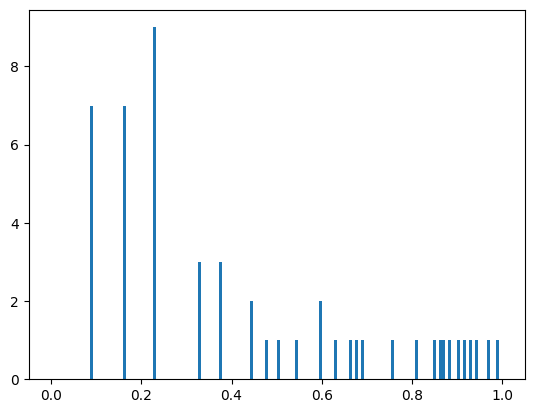

In [13]:
plt.hist(df_places["weight"], bins=150, range=(0, 1))
plt.show()

## Visualizing user `2`

In [14]:
user = 2

os_display = osg.get_object_summary(user)
os_display_coords = os_display.df_location[["lat", "lon"]]
os_display_loc = np.mean(os_display_coords, axis=0)

tile_url = "https://tiles.stadiamaps.com/tiles/alidade_smooth/{z}/{x}/{y}{r}.png"
mapbox_attr = "© <a href='https://www.stadiamaps.com/themes/'>Stadia Maps</a>"
map_os_display = folium.Map(location=os_display_loc,
                            tiles=tile_url,
                            zoom_start=6,
                            max_zoom=18,
                            control_scale=True,
                            attr=mapbox_attr)

for i, row in os_display_coords.iterrows():
    lat, lng = row["lat"], row["lon"]
    folium.CircleMarker(location=[lat, lng], radius=4, color="#000000").add_to(map_os_display)

In [15]:
map_os_display

## TODO: define objects' weights and similarity function

### Jaccard Coefficient
$$ Sim(o_1, o_2) = \frac{|o_1.visitor\cap o_2.visitor|}{|o_1.visitor\cup o_2.visitor|}$$

### Weight of Object
$$\omega_o(n_o)=\frac{n_o}{n_o+k}$$
where $n_o$ is the number of visitor visiting object $o$ and $k\geq1$